In [77]:
#extract to .py file later
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import itertools
import scipy.special
from decimal import *
import unittest as ut

from sympy.solvers import solve
from sympy import Symbol
from scipy.constants import golden as phi

from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import FuncFormatter

import sys
sys.version

'3.8.10 (default, Nov 26 2021, 20:14:08) \n[GCC 9.3.0]'

# Profitability of games with respect to a single or multiple resources

We depict cryptocurrencies as games and look at the expected profit over potentially multiple different resources. 
This can help to model the profitability of different compeating/contradictory "cryptocurrency games", or attacks. 

# 1. Single Resource (Game/Cryptocurrency)

* $ \mathcal{R}=\{R_0,R_1,...\} $ set of resources a player $i$ cares about
* $ R = \langle r,e,p,\delta \rangle $ single resource a player $i$ cares about
    * $ r $ quantity of this resource player $i$ has. For most of the notebook we assume, that $ r $ is already denoted in **value units** which we define as normalized block rewards of the base cryptocurrency. 
    * $ e $ exchange rate for this resoure, for simplicity we assume this is **set to 1 initially**
    * $ p $ reward/payoff for one step of the game, in our model this can be translated to hashrate or **p**ower of the respective player
    * $ p \cdot e $  reward/payoff for one step of the game, forever after the next (malicious) action. This incorporates the consequences of the previous action, where $ e $ describes some loss or gain as a result of this previous action. 
    * $ \delta $ discount factor.
* $ \varepsilon $ side-payment or bribe to incentivize/compensate for the previous action.

As the payoffs in an infinite game create a geometric series ($ p + p \cdot \delta + p \cdot \delta^2 + p \cdot \delta^3 \dots $), 
the payoff for the first $ n $ rounds can be written as:
$$
\begin{align}
\label{eq:reward_in_n}
 r_n := 
		\frac{
        p_i \cdot (1 - \delta^n)
    }
    {
        1 - \delta
    }
\end{align}
$$

In [78]:
#extract to .py file later
def payoff_first_n_steps(p=0.1,delta=0.9999,n=1):
    # return total payoff for the first n steps/rounds
    return ( p * (1-delta**n) )/(1 - delta)

To identify a plausible value for $\delta$ in context of cryptocurrencies, like for example Bitcoin, 
we compare different values of delta against the average amount that would be expected for a given number of rounds i.e., duration. 

In [79]:
period = 2016 # One difficulty period in Bitcoin in terms of blocks/rounds/steps
rounds_per_year=(60*24*365)/10 
periods_per_year=rounds_per_year//2016
periods_per_half_year=periods_per_year/2
print("average rounds per year        : ",rounds_per_year)
print("average periods per year       : ",periods_per_year)
print("average periods per half a year: ",periods_per_half_year)

average rounds per year        :  52560.0
average periods per year       :  26.0
average periods per half a year:  13.0


In [80]:
2016*0.1 # average number of blocks in one period with p=0.1

201.60000000000002

In [81]:
2016*0.1-2016*0.1*0.05 # average number of blocks in one period with p=0.1 with a 5% margin subtracted 

191.52

In [82]:
payoff_first_n_steps(p=0.1,delta=0.99999,n=2016)

199.58244723973354

In [83]:
payoff_first_n_steps(p=0.1,delta=0.99995,n=2016)

191.776881735283

Plot comparison between average expected reward and reward according to given delta as figure: 

In [84]:
#extract to .py file later
def plot_bitcoin_delta_approx(deltas=(0.9999,0.99999,0.999999),
                       power=0.1,
                       step=2016,
                       steps=2*13,
                       ticks=[ 1,8,2*6,2*9,2*12 ],
                       title_string="",
                       save_path=None,
                       ylim=None,
                       xlim=None):
    fig, ax = plt.subplots(figsize=(16, 9))
    
    # https://matplotlib.org/api/markers_api.html
    marker = itertools.cycle((',','v', 'o', '+','.', 's', '*','1','D','x','^'))
    
    for d in deltas:
        X = [ n for n in np.arange(0,step*steps,step) ]
        reward = [ payoff_first_n_steps(p=power,delta=d,n=x) for x in X ]
        plt.plot(X, 
                 reward, 
                 marker=next(marker), 
                 linewidth=3, 
                 label="$\delta$ = " + str(d))
    
    plt.vlines(2016,ymin=0,ymax=2016*power,color="black",linestyle="dashed")
    plt.hlines(2016*power,xmin=0,xmax=2016,color="black",linestyle="dashed")
    
    plt.vlines(2016*2,ymin=0,ymax=2016*2*power,color="black",linestyle="dashed")
    plt.hlines(2016*2*power,xmin=0,xmax=2016*2,color="black",linestyle="dashed")
    
    plt.vlines(2016*2*6,ymin=0,ymax=2016*2*6*power,color="black",linestyle="dashed")
    plt.hlines(2016*2*6*power,xmin=0,xmax=2016*2*6,color="black",linestyle="dashed")
    
    ax.annotate('average rewards after 6 months', 
                xy=(2016*2*6, 2016*2*6*power), 
                xytext=(2016*2, 2900),
                arrowprops=dict(facecolor='black', shrink=0.05))
    
    plt.vlines(2016*2*12,ymin=0,ymax=2016*2*12*power,color="black",linestyle="dashed")
    plt.hlines(2016*2*12*power,xmin=0,xmax=2016*2*12,color="black",linestyle="dashed")
    
    ax.annotate('average rewards after one year', 
                xy=(2016*2*12, 2016*2*12*power), 
                xytext=(2016*2*3, 5500),
                arrowprops=dict(facecolor='black', shrink=0.05))
    
    plt.vlines(2016*2*24,ymin=0,ymax=2016*2*24*power,color="black",linestyle="dashed")
    plt.hlines(2016*2*24*power,xmin=0,xmax=2016*2*24,color="black",linestyle="dashed")
    
    ax.annotate('average rewards after two years', 
                xy=(2016*2*24, 2016*2*24*power), 
                xytext=(2016*2*9, 10100),
                arrowprops=dict(facecolor='black', shrink=0.05))
    
    plt.vlines(2016*2*36,ymin=0,ymax=2016*2*36*power,color="black",linestyle="dashed")
    plt.hlines(2016*2*36*power,xmin=0,xmax=2016*2*36,color="black",linestyle="dashed")
    
    ax.annotate('average rewards after three years', 
                xy=(2016*2*36, 2016*2*36*power), 
                xytext=(2016*2*20, 15000),
                arrowprops=dict(facecolor='black', shrink=0.05))
    
    # tidy up the figure
    ax.grid(True)
    #ax.legend(loc='center right', bbox_to_anchor=(0.8, 0.57))
    #ax.legend(loc='center right', 
    ax.legend(loc='upper left',
              bbox_to_anchor=(0.71, .55), # location of the legend
              framealpha=1.0)             # turn off transparency of legend
    #ax.set_title("")
    ax.set_xlabel("relative block height (in steps of 2016 blocks)")
    ax.set_ylabel("normalized block rewards for mined blocks")

    if ylim is not None:
        ax.set_ylim([0,ylim])
    if xlim is not None:
        ax.set_xlim([0,xlim]) 
    #plt.yticks(np.arange(0.0, 1.5, step=0.1))
    plt.xticks(np.arange(0, step*steps, step=step))
    
    #for label in ax.xaxis.get_ticklabels()[::2]:
    for tick,label in enumerate(ax.xaxis.get_ticklabels()[::]):
        if tick in ticks:        
            label.set_visible(True)
        else:
            label.set_visible(False)
    
    #plt.yscale('log')
    matplotlib.rcParams.update(matplotlib.rcParamsDefault)
    plt.rcParams.update({'font.size': 20})
    plt.rc('xtick', labelsize=20) 
    plt.rc('ytick', labelsize=20) 
    if save_path is not None:
        plt.savefig(save_path, dpi=200) 
    plt.show()

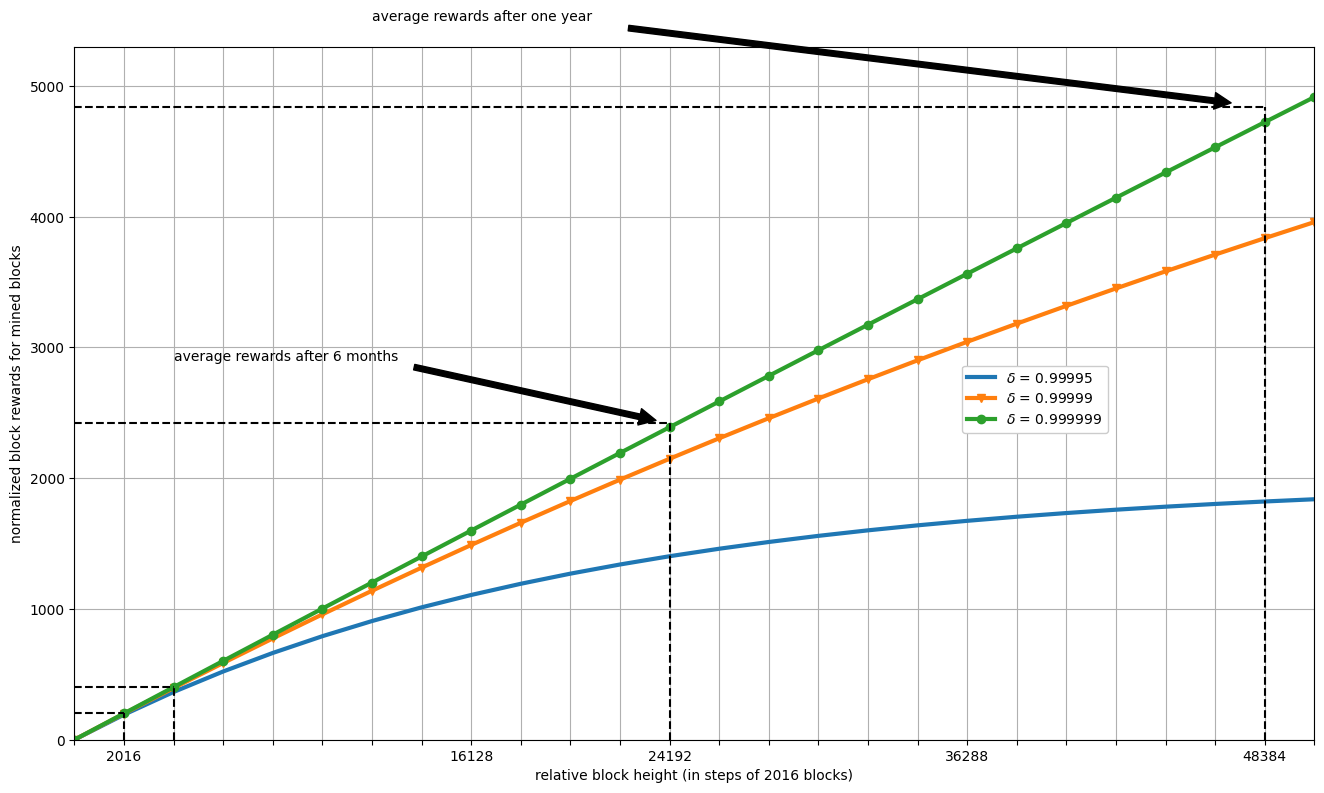

In [85]:
plot_bitcoin_delta_approx(deltas=(0.99995,0.99999,0.999999),
                       power=0.1,
                       step=2016,
                       steps=2*13,
                       ticks=[ 1,8,2*6,2*9,2*12 ],
                       title_string="",
                       save_path="../paper/codecfin/figures/delta_approx.png",
                       ylim=5000 + 300,
                       xlim=2016*2*12)

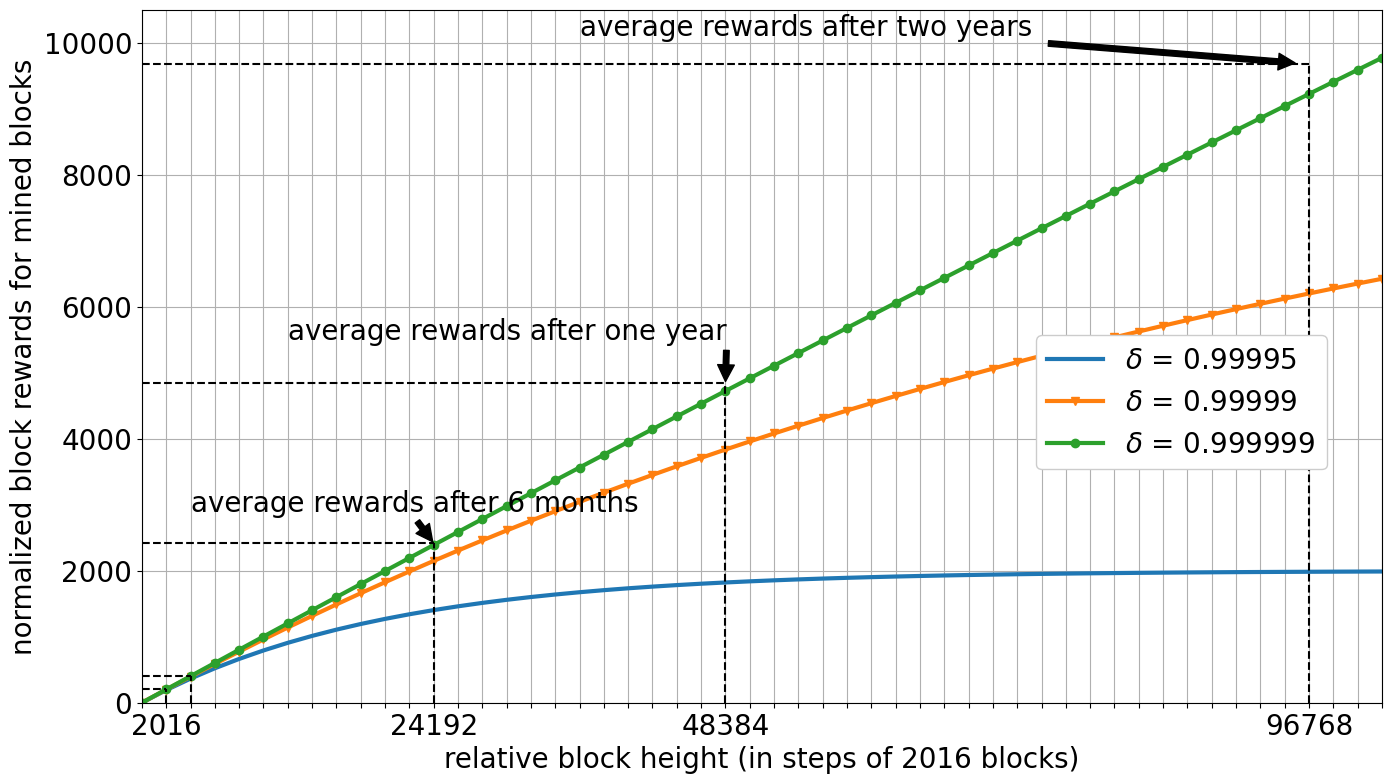

In [86]:
plot_bitcoin_delta_approx(deltas=(0.99995,0.99999,0.999999),
                       power=0.1,
                       step=2016,
                       steps=2*13*2,
                       ticks=[ 1,2*6,2*12,2*2*12 ],
                       title_string="",
                       save_path="../paper/codecfin/figures/delta_approx_2y.png",
                       ylim=10500,
                       xlim=2016*2*12*2)

In [87]:
print(2016*2*24*0.1-2016*2*24*0.1*0.05)
payoff_first_n_steps(p=0.1,delta=0.999999,n=2016*2*24)

9192.960000000001


9223.34603685486

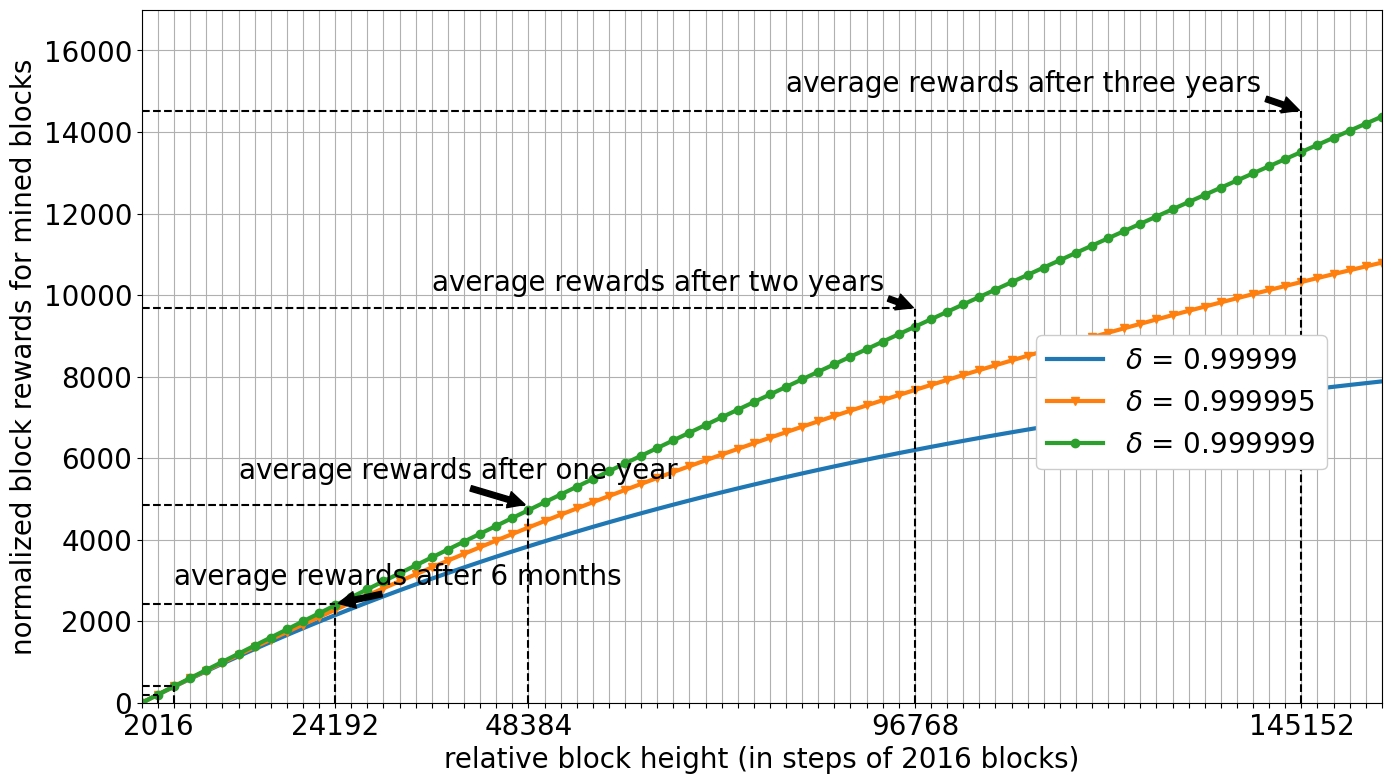

In [88]:
plot_bitcoin_delta_approx(deltas=(0.99999,0.999995,0.999999),
                       power=0.1,
                       step=2016,
                       steps=2*13*3,
                       ticks=[ 1,2*6,2*12,2*24,2*36 ],
                       xlim=150000,
                       ylim=17000,
                       title_string="",
                       save_path="../paper/codecfin/figures/delta_approx_3y.png")

## 1.1 Compare honest and attack

The payoff for the first $n$ rounds can be can be rewritten as a closed form formula for the infinite case since $ \delta^n $ goes to $ 0 $ as $ n $ goes to infinity.  
$$
\begin{align}
\label{eq:reward_in_n}
 r_n &:= ( p + p \cdot \delta + p \cdot \delta^2 + p \cdot \delta^3 \dots ) = 
		\frac{
        p_i \cdot (1 - \delta^n)
    }
    {
        1 - \delta
    }\\
 r_\infty &:= \frac{ p_i }{ 1 - \delta}
\end{align}
$$

Thus the EEV for a single actor $ i $ with hashrate $ p_i \leq 1$  in our infinite game, where every actor plays honset, can be approximated by:
$$
\begin{align}
\label{eq:eev_infty}
  EEV(R_0,\texttt{Honest},\infty) := \frac{ p_i }{ 1 - \delta}  
\end{align}
$$

We compare this payoff to another strategy which requires a different
(attack) action once and then falls back to the original honest behavior, but
with a potential negative consequence on future rewards as the exchange rate
has dropped. This is comparable to a **grim trigger** strategy in infinitely repeated
games, although in our case the environment executes the grim trigger strategy
by devaluing the global exchange rate $(e < 1)$.
In our scenario, $ \varepsilon $ is the one-time side-payment to motivate the deviation and $ e $ is the value loss in terms of a drop in exchange rate, which of course also has the same negative impact on future EEV  and thus must also be accounted for in all potential future mining rewards if the loss is (in the worst case) permanent. 
$$
\begin{align}
	EEV(R_0,\texttt{Attack},\infty) := \varepsilon + \frac{\delta \cdot p \cdot e}{1 - \delta} 
\end{align}
$$

$$
\begin{align}
&\frac{p}{1-\delta} &\text{(Total payoff for honest mining )}\\
&\varepsilon + \frac{\delta \cdot p_i \cdot e}{1-\delta} &\text{(Total payoff for defect/attack action)}\\
\end{align}
$$

$$
\begin{align}
\frac{p}{1-\delta} &= \varepsilon + \frac{\delta \cdot (pe)}{1-\delta} \\
\frac{p}{1-\delta}-\varepsilon &= \frac{\delta \cdot (pe)}{1-\delta} \\
-\varepsilon &= \frac{\delta \cdot (pe)}{1-\delta} - \frac{p}{1-\delta} \\
\varepsilon &= \frac{-(\delta \cdot (pe))}{1-\delta} + \frac{p}{1-\delta} \\
\varepsilon &= \frac{-(\delta \cdot (pe)) + p}{1-\delta} \\
\varepsilon &= \frac{\delta \cdot (pe) - p}{\delta-1} \\
\end{align}
$$

In [89]:
#extract to .py file later
def bribe_solve(p,p_new,delta,e=None):
    # Return the bribe required such that the total payoff without 
    # defect/attack actiton is equal to the total payoff with defect/attack action
    if e is not None:
        p_new=p*e 
    return ( ( delta * p_new ) - p ) / ( delta - 1)

In [90]:
bribe_solve(p=0.1,p_new=0.1,delta=0.9999)

0.09999999999997225

In [91]:
bribe_solve(p=0.1,p_new=None,delta=0.9999,e=1)

0.09999999999997225

In [92]:
bribe_solve(p=0.1,p_new=None,delta=0.99999,e=0.95)

500.0950000022763

Add some already available funds in the respective resource $ r $.
Here we assume, that $ r $ is already denoted in **value units** which we define as normalized block rewards of the base cryptocurrency. 

$$
\begin{align}
\frac{p}{1-\delta} + r &= \varepsilon + \frac{\delta \cdot (pe)}{1-\delta} + re \\
\frac{p}{1-\delta}-\varepsilon &= \frac{\delta \cdot (pe)}{1-\delta} + re - r \\
-\varepsilon &= \frac{\delta \cdot (pe)}{1-\delta} - \frac{p}{1-\delta} + re - r \\
\varepsilon &= \frac{-(\delta \cdot (pe))}{1-\delta} + \frac{p}{1-\delta} - re + r \\
\varepsilon &= \frac{-(\delta \cdot (pe)) + p}{1-\delta} - re + r\\
\varepsilon &= \frac{\delta \cdot (pe) - p}{\delta-1} - r (e - 1) \\
\end{align}
$$

In [93]:
#extract to .py file later
def bribe_solve_r(p,p_new,delta,e=None,r=0):
    # Return the bribe required such that the total payoff without 
    # defect/attack actiton is equal to the total payoff with defect/attack action
    # Added funds in the respective resource the attacker already has (r)
    if e is not None:
        p_new=p*e 
    return ( ( delta * p_new ) - p ) / ( delta - 1) - r*(e-1)

In [94]:
assert bribe_solve_r(p=0.1,p_new=None,delta=0.99999,e=0.95,r=0) == bribe_solve(p=0.1,p_new=None,delta=0.99999,e=0.95)

In [95]:
bribe_solve_r(p=0.1,p_new=None,delta=0.99999,e=0.95,r=100)

505.0950000022763

Assume that the loss in exchange rate also influences/negatively affects the received bribe

$$
\begin{align}
\frac{p}{1-\delta} + r &= \varepsilon \cdot e + \frac{\delta \cdot (pe)}{1-\delta} + re \\
\varepsilon &= \frac{ \frac{\delta \cdot (pe) - p}{\delta-1} - r (e - 1)}{e} \\
\end{align}
$$

In [96]:
#extract to .py file later
def bribedrop_solve_r(p,p_new,delta,e=None,r=0):
    # Return the bribe required such that the total payoff without 
    # defect/attack actiton is equal to the total payoff with defect/attack action
    # Added funds in the respective resource the attacker already has (r)
    # Also the bribe is subject to the exchange rate reduction
    if e is not None:
        p_new=p*e
    return ( ( ( delta * p_new ) - p ) / ( delta - 1) - r*(e-1) )/e

In [97]:
bribedrop_solve_r(p=0.1,p_new=None,delta=0.99999,e=0.95,r=0)

526.4157894760804

In [98]:
bribedrop_solve_r(p=0.1,p_new=None,delta=0.99999,e=0.95,r=100)

531.6789473708172

Double check with sympy:

$$
\begin{align}
\frac{p}{1-\delta} + r &= \varepsilon \cdot e + \frac{\delta \cdot (pe)}{1-\delta} + re \\
0 &= \varepsilon \cdot e + \frac{\delta \cdot (pe)}{1-\delta} + re - r - \frac{p}{1-\delta} \\
\end{align}
$$

In [99]:
def bribedrop_solve_r_sympy(p=0.1,
                            delta=0.9999,
                            r=0,
                            e=1):
    _E = Symbol('E') # varepsilon/bribe
    _p = Symbol('p')
    _d = Symbol('d')
    _r = Symbol('r')
    _e = Symbol('e')

    expr_zero = ( ( _E * _e ) + ( (_d * (_p*_e))/(1-_d) ) + (_r*_e) -_r - ( _p/(1-_d) ) ) 
    expr_repl = expr_zero.subs(_p,p)
    expr_repl = expr_repl.subs(_d,delta)
    expr_repl = expr_repl.subs(_r,r)
    expr_repl = expr_repl.subs(_e,e)
    rslt = float(solve(expr_repl, _E)[0])
    return rslt

In [100]:
b1 = bribedrop_solve_r(p=0.1,p_new=None,delta=0.99999,e=0.95,r=0)
b2 = bribedrop_solve_r_sympy(p=0.1,delta=0.99999,e=0.95,r=0)
assert math.isclose(b1,b2)

In [101]:
bribedrop_solve_r_sympy(p=0.1,delta=0.99999,e=0.95,r=0)

526.4157894760832

In [102]:
b1 = bribedrop_solve_r(p=0.1,p_new=None,delta=0.99999,e=0.95,r=100)
b2 = bribedrop_solve_r_sympy(p=0.1,delta=0.99999,e=0.95,r=100)
assert math.isclose(b1,b2)

In [103]:
bribedrop_solve_r_sympy(p=0.1,delta=0.99999,e=0.95,r=100)

531.67894737082

# 2. Two Resources

As a simplification, we only consider two resources for now ($|\mathcal{R}|=2$) and assume that $ r $ is already given in *value units* (normalized Bitcoin block rewards). Therefore the exchange rate is only relevant for the attack case. Here we assume, that the attack is executed on $ R_0 $, but also $ R_1 $ might suffer from immediate consequences (positive or negative) regarding its exchange rate $ e_1 $. Moreover, a bribe might be payed in $ R_0 $ (with $ \varepsilon_0$) or in $ R_1 $ (with $\varepsilon_1$) or both. 

$$
\begin{align}
EEV(\mathcal{R}_i,\texttt{Honest},\infty) &:=
\frac{p_{0}}{1-\delta_{0}} + 
r_{0} +
\frac{p_{1}}{1-\delta_{1}} + 
r_{1}\\
\,
EEV(\mathcal{R}_i,\texttt{Attack},\infty) &:=
\frac{\delta_{0} \cdot (p_{0} \cdot e_{0})}{1-\delta_{0}} + 
(\varepsilon_0 + r_{0}) \cdot e_{0} +
\frac{p_{1} \cdot e_{1}}{1-\delta_{1}} + 
(\varepsilon_1 + r_{1}) \cdot e_{1} 
\end{align}
$$

In [104]:
#extract to .py file later
def EEV_honest(p0=0.1,p1=0.1,r0=0,r1=0,d0=0.9999,d1=0.9999):
    # Calculate EEV for infinite honest strategy, 
    # for two resources
    return (p0/(1-d0))+r0+(p1/(1-d1))+r1

In [105]:
#extract to .py file later
def EEV_attack(p0=0.1,p1=0,r0=0,r1=0,d0=0.9999,d1=0,e0=0,e1=0,E0=0,E1=0):
    # Calculate EEV for attack with side effects i.e., defect with bribes and then infinite honest strategy, 
    # for two resources
    return (d0*(p0*e0))/(1-d0) + (E0+r0)*e0 + (p1*e1)/(1-d1) + (E1+r1)*e1

In [106]:
EEV_honest(p0=0.1,p1=0,r0=0,r1=0,d0=0.9999,d1=0) # one resource only

1000.0000000001102

In [107]:
EEV_honest(p0=0.1,p1=0.1,r0=0,r1=0,d0=0.9999,d1=0.9999) # two resources 

2000.0000000002203

In [108]:
EEV_honest(p0=0.1,p1=0.05,r0=0,r1=0,d0=0.9999,d1=0.99995) # increase discount factor & decrease share

2000.0000000002203

In [109]:
eev1 = EEV_honest(p0=0.1,p1=0,r0=0,r1=0,d0=0.9999,d1=0)
eev2 = EEV_attack(p0=0.1,p1=0,r0=0,r1=0,d0=0.9999,d1=0,e0=1,e1=0,E0=0.1,E1=0) # no-attack, E0 covers first round in R_0
assert math.isclose(eev1,eev2)
eev2

1000.0000000001103

In [110]:
eev1 = EEV_honest(p0=0.1,p1=0.1,r0=0,r1=0,d0=0.9999,d1=0.9999)
eev2 = EEV_attack(p0=0.1,p1=0.1,r0=0,r1=0,d0=0.9999,d1=0.9999,e0=1,e1=1,E0=0.1,E1=0) # no-attack, E0 covers first round  R_0
assert math.isclose(eev1,eev2)
eev2

2000.0000000002206

Calculate the min. bribe required. 
Rearange for sympy:
$$
\begin{align}
EEV(\mathcal{R}_i,\texttt{Honest},\infty) &= EEV(\mathcal{R}_i,\texttt{Attack},\infty) \\
0 &= 
\frac{\delta_{0} \cdot (p_{0} \cdot e_{0})}{1-\delta_{0}} + 
(\varepsilon_0 + r_{0}) \cdot e_{0} +
\frac{p_{1} \cdot e_{1}}{1-\delta_{1}} + 
(\varepsilon_1 + r_{1}) \cdot e_{1} -
\frac{p_{0}}{1-\delta_{0}} -
r_{0} - 
\frac{p_{1}}{1-\delta_{1}} -
r_{1}
\end{align}
$$

In [111]:
#extract to .py file later
def bribe_solve_two_sympy(p0=0.1,p1=0.1,
                                  d0=0.9999,d1=0.9999,
                                  r0=0,r1=0,
                                  e0=1,e1=0,
                                  E0=0,E1=0,
                                  bribeIn="R0"):
    _E0 = Symbol('E0') # varepsilon/bribe in R_0
    _E1 = Symbol('E1') # varepsilon/bribe in R_1
    _d0 = Symbol('d0')
    _d1 = Symbol('d1')
    _p0 = Symbol('p0')
    _p1 = Symbol('p1')
    _r0 = Symbol('r0')
    _r1 = Symbol('r1')
    _e0 = Symbol('e0')
    _e1 = Symbol('e1')
    expr_zero = (  
                  (_d0 * (_p0 * _e0))/(1-_d0) +
                  (_E0 + _r0) * _e0 + 
                  (_p1 * _e1)/(1-_d1) +
                  (_E1 + _r1) * _e1 - 
                  (_p0/(1-_d0)) - 
                  _r0 - 
                  (_p1/(1-_d1)) -
                  _r1 ) 
    expr_repl = expr_zero.subs(_p0,p0).subs(_p1,p1)
    expr_repl = expr_repl.subs(_d0,d0).subs(_d1,d1)
    expr_repl = expr_repl.subs(_r0,r0).subs(_r1,r1)
    expr_repl = expr_repl.subs(_e0,e0).subs(_e1,e1)
    if bribeIn == "R0":
        expr_repl = expr_repl.subs(_E1,E1)
        rslt = float(solve(expr_repl, _E0)[0])
    elif bribeIn == "R1":
        expr_repl = expr_repl.subs(_E0,E0)
        rslt = float(solve(expr_repl, _E1)[0])
    else:
        assert False,'Solve for bribeIn="R0" or "R1"'
    return rslt

In [112]:
b_ori = bribe_solve(p=0.1,p_new=0.1,delta=0.9999)
b_new = bribe_solve_two_sympy(p0=0.1,p1=0.0,
                              d0=0.9999,d1=0,
                              r0=0,r1=0,
                              e0=1,e1=0)
# Compare against original, single resource case, when R1 is set to 0
print(b_ori," ~= ",b_new)
assert math.isclose(b_ori,b_new)

0.09999999999997225  ~=  0.1


In [113]:
b_ori = bribe_solve(p=0.1,p_new=0.1*(0.98),delta=0.9999)
b_new = bribe_solve_two_sympy(p0=0.1,p1=0.0,
                              d0=0.9999,d1=0.9999,
                              r0=0,r1=0,
                              e0=0.98,e1=1,
                              bribeIn="R1")
# compare against a bribe is payed in R1, with no negative side effects on this resource (e1=1),
# but also no hashrate in in R1 (p1=0)
print(b_ori," ~= ",b_new)
assert math.isclose(b_ori,b_new)

20.098000000002273  ~=  20.0980000000021


In [114]:
# Total loss of value of one cryptocurrency, 
# If the bribe would not be effected by the exchange rate drop it would be half 
bribe_solve_two_sympy(p0=0.1,p1=0.1,
                      d0=0.999,d1=0.999,
                      r0=0,r1=0,
                      e0=0.5,e1=0,
                      bribeIn="R0")

300.1

## 2.2 Multiple resources

Notation with a $ \varepsilon_0 $ for the first round of the attacked game/cryptocurrency and an $ \varepsilon $ for every other game/cryptocurrency not under attack. But negative or positive consequences can immediatly propergate to other games/cryptocurrencies via the respective exchange rate:
$$
\begin{align}
EEV(\mathcal{R}_i,\texttt{Honest},\infty) &:=
\sum_{j=0 }^{| \mathcal{R}_i |} \left( \frac{p_{j}}{1-\delta_{j}} \right) + 
\sum_{j=0 }^{| \mathcal{R}_i |} f_i(r_j,e_j) 
\\
\,
EEV(\mathcal{R}_i,\texttt{Attack},\infty)  &:=
f_i(\varepsilon_0 + r_0,e_{0}) + 
\frac{\delta_{0} \cdot (p_{0} \cdot e_{0})}{1-\delta_{0}} + 
\sum_{j=1}^{| \mathcal{R}_i |} \left( \frac{p_{j} \cdot e_{j}}{1-\delta_{j}} \right) + 
\sum_{j=1}^{| \mathcal{R}_i |} f_i(r_j,e_j) 
\end{align}
$$


## 2.3 Seperate static funds and gains calculation and include exchange rate everywhere

To later draw the figure, we split the calculations, s.t. we can compose them later to draw the example figures with normalized total payoffs/rewards. 

The gains are calculated for all rounds, including the first: 
$$
\begin{align}
EEV_{gains}(R_0) &:=
\frac{p_{0} \cdot e_{0}}{1-\delta_{0}} \\
EEV_{funds}(R_0) &:= r_{0} \cdot e_{0}
\end{align}
$$

$$
\begin{align}
EEV_{gains}(R_1) &:=
\frac{p_{1} \cdot e_{1}}{1-\delta_{1}} \\
EEV_{funds}(R_1) &:= r_{1} \cdot e_{1}
\end{align}
$$

In [115]:
#extract to .py file later
def EEV_gains(p=0.1,e=1,d=0.9999):
    return (p * e)/(1 - d)

In [116]:
#extract to .py file later
def EEV_funds(r=0,e=1):
    return r * e

In [117]:
#extract to .py file later
def d_solve(p=0.1,R=1):
    # Given a EEV result R and power p, return delta
    return (R-p)/R

The gains are calculated for all rounds, except the first: 
$$
\begin{align}
EEV_{gains\;after}(R_0) &:=
\frac{\delta_{0} \cdot (p_{0} \cdot e_{0})}{1-\delta_{0}} \\
EEV_{funds\;after}(R_0) &:= (\varepsilon_0 + r_{0}) \cdot e_{0}  
\end{align}
$$    

$$
\begin{align}
EEV_{gains\;after}(R_1) &:=
\frac{\delta_{1} \cdot (p_{1} \cdot e_{1})}{1-\delta_{1}} \\
EEV_{funds\;after}(R_1) &:= (\varepsilon_1 + r_{1}) \cdot e_{1}  
\end{align}
$$    

In [118]:
#extract to .py file later
def EEV_gains_after(p=0.1,e=1,d=0.9999):
    return (d * (p * e))/(1 - d)

In [119]:
#extract to .py file later
def EEV_funds_after(r=0,e=1,E=0):
    return (E + r) * e

In [120]:
#extract to .py file later
def d_solve_after(p=0.1,R=1):
    # Given a EEV result R and power p, return delta
    return R/(p+R)

Compute some values and check if they can be plausible/correct:

In [121]:
r0 = EEV_gains(p=0.1,e=1,d=0.9999) + EEV_funds(r=0,e=1)
r1 = EEV_gains(p=0.05,e=1,d=0.99995) + EEV_funds(r=0,e=1)
print(r0," ~= ",r1)
assert r0 == r1

1000.0000000001102  ~=  1000.0000000001102


In [122]:
r0 = EEV_gains(p=0.1,e=1,d=0.9999) + EEV_funds(r=10,e=1)
r1 = EEV_gains(p=0.05,e=1,d=0.99995) + EEV_funds(r=5,e=2)
print(r0," ~= ",r1)
assert r0 == r1

1010.0000000001102  ~=  1010.0000000001102


In [123]:
r0 = EEV_gains(p=0.51,e=1,d=0.999999)
r1 = EEV_gains(p=0.51,e=0.9,d=0.999999)
print(r0*0.9," ~= ",r1)
assert r0*0.9 == r1

458999.9999868012  ~=  458999.9999868012


In [124]:
r0   = EEV_gains(p=0.1,e=1,d=0.999999)
diff = EEV_gains(p=0.1,e=0.5,d=0.999999)
r1   = EEV_gains(p=0.1,e=1.5,d=0.999999)
print(r0," ~= ",r1 - diff)
assert math.isclose(r0,r1 - diff)

99999.99999712444  ~=  99999.99999712445


In [125]:
r0 = EEV_gains_after(p=0.1,e=1,d=0.9999) 
r1 = EEV_gains_after(p=0.05,e=1,d=0.99995) 
print(r0," < ",r1)
assert r0 < r1

999.9000000001103  <  999.9500000001101


In [126]:
r0 = EEV_gains_after(p=0.1,e=1,d=0.9999)  + EEV_funds(r=10,e=1)
r1 = EEV_gains_after(p=0.05,e=1,d=0.99995) + EEV_funds(r=10,e=1)
print(r0," < ",r1)
assert r0 < r1

1009.9000000001103  <  1009.9500000001101


In [127]:
R=1009.9500000001101 - 10
d_solve(p=0.05,R=R)

0.999949997499875

In [128]:
r1 = EEV_gains_after(p=0.05,e=1,d=0.999949997499875) + EEV_funds(r=10,e=1)
r1 # off-by-one because wrong solve

1009.9000000003167

In [129]:
R=1009.9500000001101 - 10
d_solve_after(p=0.05,R=R)

0.99995

In [130]:
r1 = EEV_gains_after(p=0.05,e=1,d=0.99995) + EEV_funds(r=10,e=1)
r1 

1009.9500000001101

# 3 Draw example figures

In [131]:
#extract source to .py later
def plot_bar_payoff_after(b_p0=0,b_p1=0,
                          a_p0=0,a_p1=0,
                          b_d0=0,b_d1=0,
                          a_d0=0,a_d1=0,
                          b_r0=0,b_r1=0,
                          a_r0=0,a_r1=0,
                          b_e0=1,b_e1=1,
                          a_e0=1,a_e1=1,
                          E0=0,E1=0,
                          ymax_ax1=None,
                          ymax_ax2=None,
                          yticklist_ax1=None,
                          yticklist_ax2=None,
                          save_path=None,
                          skip_round=False,
                          ylabel='normalized block rewards',
                          xticklabels=["before","after"],
                          show_diff=True,
                          double_spend=0):
     
    x_names = ('$ C_0 $,$ C_1 $,sum (before)','$C_0$,$C_1$,sum (after)','total difference',)
    x_values = np.arange(len(x_names))
    
    
    b_payoff0 = EEV_gains(p=b_p0,e=b_e0,d=b_d0)
    b_payoff1 = EEV_gains(p=b_p1,e=b_e1,d=b_d1)
    b_funds0 = EEV_funds(r=b_r0,e=b_e0)
    b_funds1 = EEV_funds(r=b_r1,e=b_e1)
    b_sum = b_payoff0 + b_payoff1 + b_funds0 + b_funds1
        
    if skip_round:
        a_payoff0 = EEV_gains_after(p=a_p0,e=a_e0,d=a_d0)
        a_payoff1 = EEV_gains_after(p=a_p1,e=a_e1,d=a_d1)
    else:
        a_payoff0 = EEV_gains(p=a_p0,e=a_e0,d=a_d0)
        a_payoff1 = EEV_gains(p=a_p1,e=a_e1,d=a_d1)
    a_funds0 = EEV_funds(r=a_r0,e=a_e0)
    a_funds1 = EEV_funds(r=a_r1,e=a_e1)
    a_sum = a_payoff0 + a_payoff1 + a_funds0 + a_funds1 + E0*a_e0 + E1*a_e1

    gain = (a_sum+double_spend) - b_sum 
    
    print("sum (before) = ",b_sum)
    print("sum (after)  = ",a_sum)
    print("double spend = ",double_spend)
    print("total after  = ",a_sum + double_spend)
    print("gain         = ",gain)
    
    loss_funds0 = a_funds0 - b_funds0
    loss_funds1 = a_funds1 - b_funds1
    loss_payoff0 = a_payoff0 - b_payoff0
    loss_payoff1 = a_payoff1 - b_payoff1
    
    total_loss = 0
    if loss_funds0 < 0:
        total_loss += loss_funds0
    if loss_funds1 < 0:
        total_loss += loss_funds1
    if loss_payoff0 < 0:
        total_loss += loss_payoff0
    if loss_payoff1 < 0:
        total_loss += loss_payoff1
    
    matplotlib.rcParams.update(matplotlib.rcParamsDefault)
    s = 0.35
    fig, ax1 = plt.subplots(figsize=(16*s,9*s))
                            #gridspec_kw = {'height_ratios':[10, 8]})
    
    #plt.subplots_adjust(wspace=0, 
    #                    hspace=0.025)
  
    width=0.5
    # currency 0 before 
    ax1.bar(0 - width/2,
            b_funds0,
            width=width,
            label='Funds $ r_0 $',
            color='lightgray', 
            align='edge', 
            hatch='oo', 
            edgecolor='black')    
    ax1.bar(0 - width/2, 
            b_payoff0,
            width=width,
            bottom=b_funds0,
            label='Expected Funds $ p_0 $',
            color='lightgray', 
            align='edge', 
            hatch='\\\\\\',
            edgecolor='black')
    
    # currency 1 before
    ax1.bar(0 - width/2,
            b_funds1,
            width=width,
            bottom=b_funds0 + b_payoff0,
            label='Funds $ r_1 $',
            color='lightblue', 
            align='edge', 
            hatch='oo', 
            edgecolor='black')    
    ax1.bar(0 - width/2, 
            b_payoff1,
            width=width,
            bottom=b_funds0 + b_payoff0 + b_funds1,
            label='Expected Funds $ p_1 $',
            color='lightblue', 
            align='edge', 
            hatch='\\\\\\',
            edgecolor='black')
    
    # currency 0 after
    if E0 != 0:
        ax1.bar(1 - width/2,
                E0*a_e0,
                width=width,
                label='Bribe in $ r_0 $',
                color='gold', 
                align='edge', 
                hatch='oo', 
                edgecolor='black')
    ax1.bar(1 - width/2,
            a_funds0,
            width=width,
            bottom=E0*a_e0,
            #label='Funds',
            color='lightgray', 
            align='edge', 
            hatch='oo', 
            edgecolor='black')    
    ax1.bar(1 - width/2, 
            a_payoff0,
            width=width,
            bottom=a_funds0 + E0*a_e0,
            #label='Payoffs',
            color='lightgray', 
            align='edge', 
            hatch='\\\\\\',
            edgecolor='black')
    
    # currrency 1 after
    if E1 != 0:
        ax1.bar(1 - width/2,
                E1*a_e1,
                width=width,
                bottom=a_funds0 + E0*a_e0 + a_payoff0,
                label='Bribe in $ r_1 $',
                color='gold', 
                align='edge', 
                hatch='oo', 
                edgecolor='black')
    ax1.bar(1- width/2,
            a_funds1,
            bottom=a_funds0 + E0*a_e0 + a_payoff0 + E1*a_e1,
            width=width,
            #label='Funds',
            color='lightblue', 
            align='edge', 
            hatch='oo', 
            edgecolor='black')    
    ax1.bar(1- width/2, 
            a_payoff1,
            bottom=a_funds0 + E0*a_e0 + a_payoff0 + a_funds1 + E1*a_e1,
            width=width,
            #label='Payoffs',
            color='lightblue', 
            align='edge', 
            hatch='\\\\\\',
            edgecolor='black')
    
    if show_diff and gain > 0:
        ax1.bar(1- width/2, 
                gain,
                width=width,
                bottom=b_funds0 + b_payoff0 + b_funds1 + b_payoff1,
                label='Gain',
                color='mediumseagreen', 
                align='edge', 
                hatch='++', 
                edgecolor='black')
        
    if show_diff and gain < 0:
        ax1.bar(1- width/2, 
                b_sum - a_sum,
                width=width,
                bottom=a_funds0 + E0*a_e0 + a_payoff0 + a_funds1 + E1*a_e1 + a_payoff1,
                label='Loss',
                color='lightcoral', 
                align='edge', 
                hatch='XXX', 
                edgecolor='black')

    if double_spend > 0:
        ax1.bar(1- width/2, 
                double_spend,
                bottom=a_funds0 + E0*a_e0 + a_payoff0 + a_funds1 + E1*a_e1 + a_payoff1,
                width=width,
                label='Double-spend $r_3$',
                color='mediumseagreen', 
                align='edge', 
                hatch='++',
                edgecolor='black')
    
    if ymax_ax1 is not None:
        ax1.set_ylim(0, ymax_ax1)
        #ax2.set_ylim(-(ymax_ax2), 0)
        
    if ymax_ax1 is not None and yticklist_ax1 is None:
        yticks = [ 0,ymax_ax1//5,(ymax_ax1//5)*2,(ymax_ax1//5)*3,(ymax_ax1//5)*4, (ymax_ax1//5)*5 ]
        ax1.yaxis.set_ticks(yticks)
        yticks = [ -ymax_ax2//5,(-ymax_ax2//5)*2,(-ymax_ax2//5)*3,(-ymax_ax2//5)*4, (-ymax_ax2//5)*5,0 ]
        #ax2.yaxis.set_ticks(yticks)
   
    if ymax_ax1 is not None and yticklist_ax1 is not None:
        ax1.yaxis.set_ticks(yticklist_ax1)
        #ax2.yaxis.set_ticks(yticklist_ax2)
   
    #ax2.yaxis.get_major_ticks()[-1].label1.set_visible(False)
        
    # ax.bar(, color='r')
    ax1.set_xlim(0 - 0.5,3)
    #ax2.set_xlim(0 - 0.5,3)
    
    ax1.xaxis.set_ticks([0,1])
    ax1.set_xticklabels(xticklabels)
    
    #ax2.set_xticks(x_values)
    #ax2.set_xticklabels(x_names)
    #ax2.get_xticklabels()[0].set_ha("left")
    #ax2.get_xticklabels()[-1].set_ha("right")
    
    #ax2.xaxis.set_major_formatter(FuncFormatter(lambda x,_: str(int())))
    #ax2.yaxis.set_major_formatter(FuncFormatter(lambda x,_: str(int(abs(x)))))
    #ax2.yaxis.get_major_ticks()[-1].label1.set_visible(False) # undisplay 0 on y axis of ax2
    
    ax1.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
    #ax2.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
    
    #ax2.set_xlabel('')    
    #ax2.set_ylabel(' '*45 + 'expected normalized block rewards')
    ax1.set_ylabel(ylabel)
    
    plt.figlegend(loc='upper right',
                  bbox_to_anchor=(0.9, 0.89),
                  framealpha=1,
                  ncol=1)
    
    if save_path is not None:
        plt.savefig(save_path, dpi=200, bbox_inches='tight')
    plt.show()

### Double-Spend in a shitcoin (relative personal income)

$ p_0 + r_0 + p_1 + r_1 = 1$

sum (before) =  1.0
sum (after)  =  0.9649999999999999
double spend =  0.1
total after  =  1.065
gain         =  0.06499999999999995


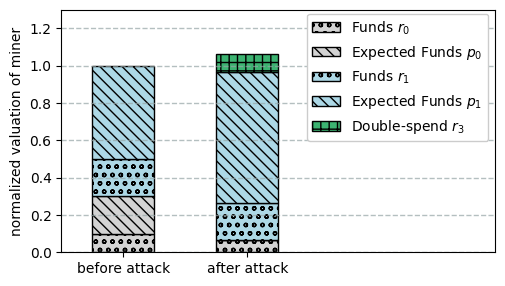

In [132]:
# attack on shitcoin, double-spend in shitcoin then immediatly leave with hashrate
plot_bar_payoff_after(b_p0=0.20,b_p1=0.50,
                      a_p0=0,a_p1=0.70,
                      b_d0=0,b_d1=0,
                      a_d0=0,a_d1=0,
                      b_r0=0.1,b_r1=0.2,
                      a_r0=0.1,a_r1=0.2,
                      b_e0=1,b_e1=1,
                      a_e0=0.65,a_e1=1,
                      E0=0,E1=0,
                      ymax_ax1=1.3,
                      ymax_ax2=1.3,
                      show_diff=False,
                      double_spend=0.1,
                      yticklist_ax1=[ 0.2,0.4,0.6,0.8,1.0,1.2,0 ],
                      yticklist_ax2=[ -0.2,-0.4,-0.6,-0.8,-1.0,0 ],
                      ylabel="normalized valuation of miner",
                      xticklabels=["before attack","after attack"],
                      save_path="../paper/codecfin/figures/currency_compare_attack_shitcoin_rel.png")

$ (r_0)\cdot e'_0 + (p_1+p_0+ r_1)\cdot e'_1 + r_3$

In [133]:
p0=0.2
r0=0.1
_e0=0.65
p1=0.5
r1=0.2
_e1=1
r3=0.1
assert p0+r0+p1+r1 == 1
(r0)*_e0+(p1+p0+r1)*_e1 + r3

1.065

### Goldfinger attack on cryptocurrency (relative to personal income)

Other currency gets more valueable (Goldfinger):
If I have a lot of funds in $ R_1 $ then I win proportionally more, this money can be invested to bribe other to make this attack real. Bribing smaller miners is better as they dont lose that much.  

sum (before) =  1.0
sum (after)  =  1.1
double spend =  0
total after  =  1.1
gain         =  0.10000000000000009


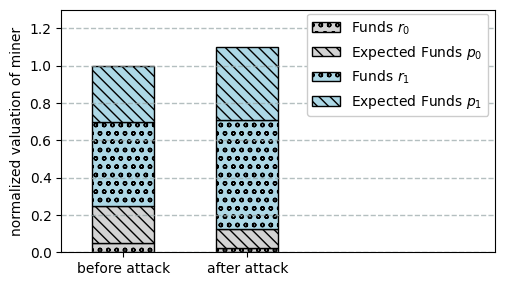

In [134]:
# goldfinger attack
plot_bar_payoff_after(b_p0=0.2,b_p1=0.3,
                      a_p0=0.2,a_p1=0.3,
                      b_d0=0,b_d1=0,
                      a_d0=0,a_d1=0,
                      b_r0=0.05,b_r1=0.45,
                      a_r0=0.05,a_r1=0.45,
                      b_e0=1,b_e1=1,
                      a_e0=0.5,a_e1=1.3,
                      E0=0,E1=0,
                      ymax_ax1=1.3,
                      ymax_ax2=1.3,
                      show_diff=False,
                      yticklist_ax1=[ 0.2,0.4,0.6,0.8,1.0,1.2,0 ],
                      yticklist_ax2=[ -0.2,-0.4,-0.6,-0.8,-1.0,0 ],
                      ylabel="normalized valuation of miner",
                      xticklabels=["before attack","after attack"],
                      save_path="../paper/codecfin/figures/currency_compare_attack_goldfinger_rel.png")

$ (p_0 + r_0)\cdot e'_0 + (p_1 + r_1)\cdot e'_1 $

In [135]:
p0=0.2
r0=0.05
_e0=0.5
p1=0.3
r1=0.45
_e1=1.3
assert p0+r0+p1+r1 == 1
(p0+r0)*_e0+(p1+r1)*_e1

1.1

### Fork a cryptocurrency as miner (relative to personal income)

sum (before) =  1.0
sum (after)  =  0.605
double spend =  0
total after  =  0.605
gain         =  -0.395


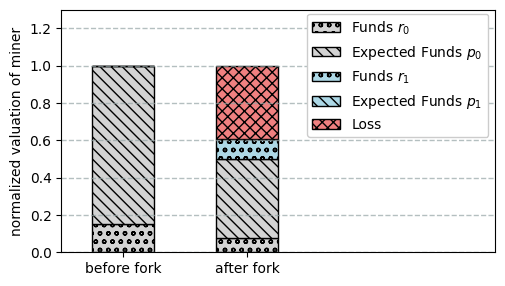

In [136]:
plot_bar_payoff_after(b_p0=1-0.15,b_p1=0,
                      a_p0=1-0.15,a_p1=0,
                      b_d0=0,b_d1=0,
                      a_d0=0,a_d1=0,
                      b_r0=0.15,b_r1=0,
                      a_r0=0.15,a_r1=0.15,
                      b_e0=1,b_e1=1,
                      a_e0=0.5,a_e1=0.7,
                      E0=0,E1=0,
                      ymax_ax1=1.3,
                      ymax_ax2=1.3,
                      skip_round=False,
                      ylabel="normalized valuation of miner",
                      yticklist_ax1=[ 0.2,0.4,0.6,0.8,1.0,1.2,0 ],
                      yticklist_ax2=[ -0.2,-0.4,-0.6,-0.8,-1.0,0 ],
                      xticklabels=["before fork","after fork"],
                      save_path="../paper/codecfin/figures/currency_compare_fork_miner_rel.png")

$ (p_0 + r_0)\cdot e'_0 + r_1\cdot e'_1 $

In [137]:
p0=0.85
r0=0.15
_e0=0.5
p1=0.0
r1=0.15
_e1=0.7
assert p0+r0 == 1
(p0+r0)*_e0+(p1+r1)*_e1

0.605

### Fork a cryptocurrency as user (relative to personal income)
As a user, every fork where the loss (drop in exchange rate) is less than half in both is fine. 

sum (before) =  1.0
sum (after)  =  1.2
double spend =  0
total after  =  1.2
gain         =  0.19999999999999996


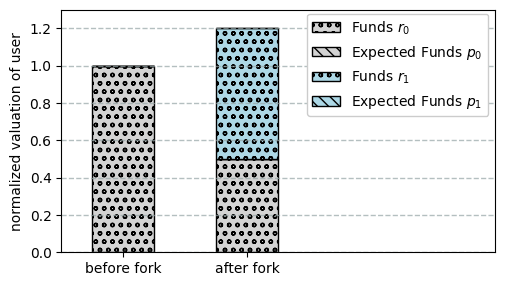

In [138]:
plot_bar_payoff_after(b_p0=0,b_p1=0,
                      a_p0=0,a_p1=0,
                      b_d0=0,b_d1=0,
                      a_d0=0,a_d1=0,
                      b_r0=1,b_r1=0,
                      a_r0=1,a_r1=1,
                      b_e0=1,b_e1=1,
                      a_e0=0.5,a_e1=0.7,
                      E0=0,E1=0,
                      ymax_ax1=1.3,
                      ymax_ax2=1.3,
                      skip_round=False,
                      show_diff=False,
                      ylabel="normalized valuation of user",
                      yticklist_ax1=[ 0.2,0.4,0.6,0.8,1.0,1.2,0 ],
                      yticklist_ax2=[ -0.2,-0.4,-0.6,-0.8,-1.0,0 ],
                      xticklabels=["before fork","after fork"],
                      save_path="../paper/codecfin/figures/currency_compare_fork_user_rel.png")

$ (p_0 + r_0)\cdot e'_0 + r_1\cdot e'_1 $

In [139]:
p0=0.0
r0=1
_e0=0.5
p1=0.0
r1=1
_e1=0.7
assert p0+r0 == 1
(p0+r0)*_e0+(p1+r1)*_e1

1.2

### Attack on cryptocurrency without escape route (relative to personal income)

Attack on cryptocurrency without escape route:

sum (before) =  1.0
sum (after)  =  0.9000000000000001
double spend =  0
total after  =  0.9000000000000001
gain         =  -0.09999999999999987


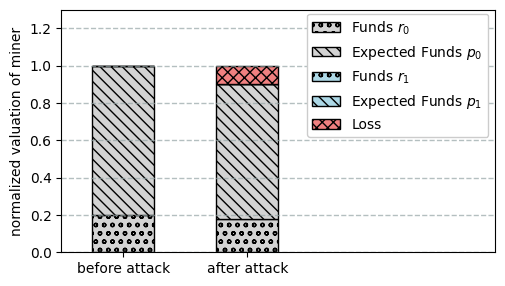

In [140]:
plot_bar_payoff_after(b_p0=0.8,b_p1=0,
                      a_p0=0.8,a_p1=0,
                      b_d0=0,b_d1=0,
                      a_d0=0,a_d1=0,
                      b_r0=0.2,b_r1=0,
                      a_r0=0.2,a_r1=0,
                      b_e0=1,b_e1=1,
                      a_e0=0.9,a_e1=1, 
                      E0=0,E1=0,   
                      ymax_ax1=1.3,
                      ymax_ax2=1.3,
                      skip_round=False,
                      ylabel="normalized valuation of miner",
                      yticklist_ax1=[ 0.2,0.4,0.6,0.8,1.0,1.2,0 ],
                      yticklist_ax2=[ -0.2,-0.4,-0.6,-0.8,-1.0,0 ],
                      xticklabels=["before attack","after attack"],
                      save_path="../paper/codecfin/figures/currency_compare_attack_miner_rel.png")

$ (p_0 + r_0)\cdot e'_0 $

In [141]:
p0=0.8
r0=0.2
_e0=0.9
p1=0.0
r1=0.0
_e1=0
assert p0+r0+p1+r1 == 1
(p0+r0)*_e0+(p1+r1)*_e1

0.9

### Attack on cryptocurrency with escape route (relative to personal income)

Example, if bribe in other cryptocurrency compensates for loss in future payoffs, and lossless exchange possible:

sum (before) =  1.0
sum (after)  =  1.0200000000000002
double spend =  0
total after  =  1.0200000000000002
gain         =  0.02000000000000024


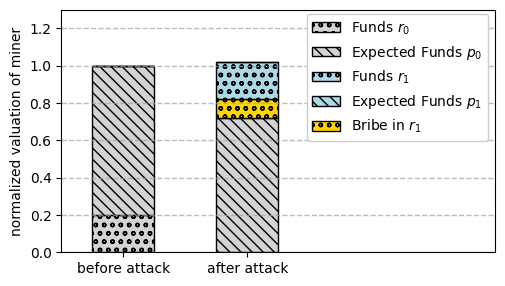

In [142]:
plot_bar_payoff_after(b_p0=0.8,b_p1=0,
                      a_p0=0.8,a_p1=0,
                      b_d0=0,b_d1=0,
                      a_d0=0,a_d1=0,
                      b_r0=0.2,b_r1=0,
                      a_r0=0,a_r1=0.2,
                      b_e0=1,b_e1=1,
                      a_e0=0.9,a_e1=1, 
                      E0=0,E1=0.1,   
                      ymax_ax1=1.3,
                      ymax_ax2=1.3,
                      skip_round=False,
                      show_diff=False,
                      ylabel="normalized valuation of miner",
                      yticklist_ax1=[ 0.2,0.4,0.6,0.8,1.0,1.2,0 ],
                      yticklist_ax2=[ -0.2,-0.4,-0.6,-0.8,-1.0,0 ],
                      xticklabels=["before attack","after attack"],
                      save_path="../paper/codecfin/figures/currency_compare_attack_miner_rel_2.png")

$ (p_0 + r_0)\cdot e'_0 + (r_1 + \varepsilon)\cdot e'_1 $

In [143]:
bribe1=0.1
p0=0.8
r0=0
_e0=0.9
p1=0.0
r1=0.2
_e1=1
assert p0+r0+p1+r1 == 1
(p0+r0)*_e0+(p1+r1+bribe1)*_e1

1.02

In [144]:
# This would happen if the holding where subject to loss 
(0.8+0.2)*0.9 + 0.1

1.0

In [145]:
# But they are not, this is why this happens:
print(0.8*0.9)
0.8*0.9 + 0.2 + 0.1

0.7200000000000001


1.0200000000000002

### Pitchfork (merge mined fork) attack on cryptocurrency (relative to personal income)

Pitchforks attack, fork currency and the fork together with the original is a little
bit more valuable than before: 

sum (before) =  1.0
sum (after)  =  1.056
double spend =  0
total after  =  1.056
gain         =  0.05600000000000005


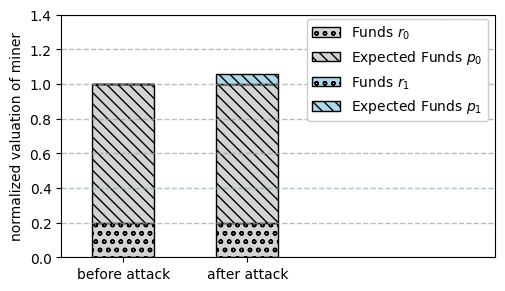

In [146]:
# merged mining
plot_bar_payoff_after(b_p0=0.8,b_p1=0,
                      a_p0=0.8,a_p1=0.8, # having some in merge mined cryptocurrency
                      b_d0=0,b_d1=0,
                      a_d0=0,a_d1=0,
                      b_r0=0.2,b_r1=0,
                      a_r0=0.2,a_r1=0,
                      b_e0=1,b_e1=1,
                      a_e0=1,a_e1=0.07, # merge mined cryptocurrency is worth almost nothing, but still...
                      E0=0,E1=0,
                      ymax_ax1=1.4,
                      ymax_ax2=1.4,
                      show_diff=False,
                      yticklist_ax1=[ 0.2,0.4,0.6,0.8,1.0,1.2,1.4,0 ],
                      yticklist_ax2=[ -0.2,-0.4,-0.6,-0.8,-1.0,0 ],
                      ylabel="normalized valuation of miner",
                      xticklabels=["before attack","after attack"],
                      save_path="../paper/codecfin/figures/currency_compare_attack_merged_rel.png")

sum (before) =  1.0
sum (after)  =  1.02
double spend =  0
total after  =  1.02
gain         =  0.020000000000000018


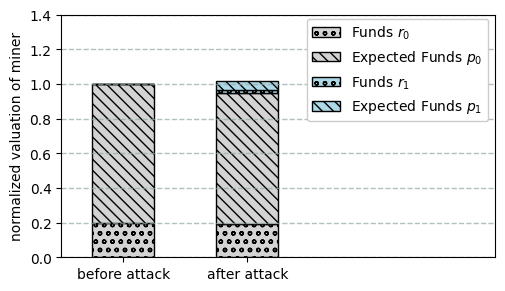

In [147]:
# pitchfork mining
plot_bar_payoff_after(b_p0=0.8,b_p1=0,
                      a_p0=0.8,a_p1=0.8, # having so hashrate somewhere
                      b_d0=0,b_d1=0,
                      a_d0=0,a_d1=0,
                      b_r0=0.2,b_r1=0,
                      a_r0=0.2,a_r1=0.2, # also included fork of funds
                      b_e0=1,b_e1=0,
                      a_e0=0.95,a_e1=0.07,  # exchange rate of 
                      E0=0,E1=0,
                      ymax_ax1=1.4,
                      ymax_ax2=1.4,
                      show_diff=False,
                      yticklist_ax1=[ 0.2,0.4,0.6,0.8,1.0,1.2,1.4,0 ],
                      yticklist_ax2=[ -0.2,-0.4,-0.6,-0.8,-1.0,0 ],
                      ylabel="normalized valuation of miner",
                      xticklabels=["before attack","after attack"],
                      save_path="../paper/codecfin/figures/currency_compare_attack_pitchfork_rel.png")

### Other cryptocurrency which is more valuable (relative to personal income)
Another cryptocurrency gets more valueable if my total mining reward is normalized to 1.
Then of course switching is more profitable, even more so if the old cryptocurrency crashes. 

sum (before) =  1.0
sum (after)  =  1.05
double spend =  0
total after  =  1.05
gain         =  0.050000000000000044


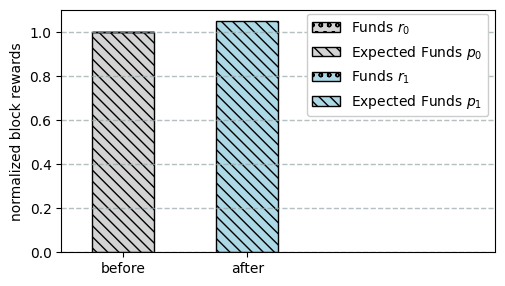

In [148]:
plot_bar_payoff_after(b_p0=1,b_p1=0,
                      a_p0=0,a_p1=1,
                      b_d0=0,b_d1=0,
                      a_d0=0,a_d1=0,
                      b_r0=0,b_r1=0,
                      a_r0=0,a_r1=0,
                      b_e0=1,b_e1=1,
                      a_e0=0,a_e1=1.05,
                      E0=0,E1=0,
                      skip_round=False,
                      ymax_ax1=1.1,
                      ymax_ax2=1.1,
                      show_diff=False,
                      yticklist_ax1=[ 0.2,0.4,0.6,0.8,1.0,0 ],
                      yticklist_ax2=[ -0.2,-0.4,-0.6,-0.8,-1.0,0 ])

Other currency that is less valueable but my mining share is larger:

sum (before) =  1.0
sum (after)  =  1.0
double spend =  0
total after  =  1.0
gain         =  0.0


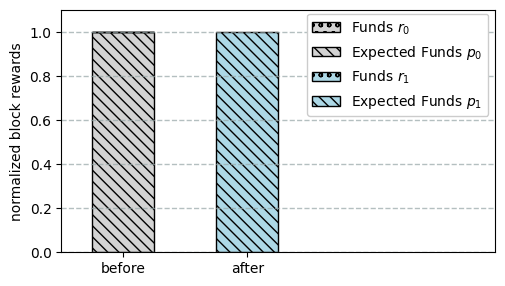

In [149]:
plot_bar_payoff_after(b_p0=1,b_p1=0,
                      a_p0=0,a_p1=1.25,
                      b_d0=0,b_d1=0,
                      a_d0=0,a_d1=0,
                      b_r0=0,b_r1=0,
                      a_r0=0,a_r1=0,
                      b_e0=1,b_e1=1,
                      a_e0=1,a_e1=0.8,
                      E0=0,E1=0,
                      ymax_ax1=1.1,
                      ymax_ax2=1.1,
                      yticklist_ax1=[ 0.2,0.4,0.6,0.8,1.0,0 ],
                      yticklist_ax2=[ -0.2,-0.4,-0.6,-0.8,-1.0,0 ])

Including share of coins in my total income. Its worth sacrificing if the gain 
in hashrate accounts for the loss. 

In [150]:
0.9*1.1

0.9900000000000001

In [151]:
0.9*1.112

1.0008000000000001

sum (before) =  1.0
sum (after)  =  1.0080000000000002
double spend =  0
total after  =  1.0080000000000002
gain         =  0.00800000000000023


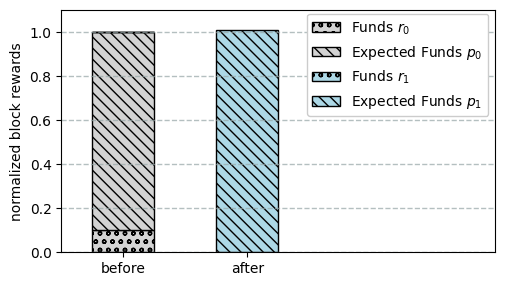

In [152]:
plot_bar_payoff_after(b_p0=0.9,b_p1=0,
                      a_p0=0,a_p1=0.9,
                      b_d0=0,b_d1=0,
                      a_d0=0,a_d1=0,
                      b_r0=0.1,b_r1=0,
                      a_r0=0.1,a_r1=0,
                      b_e0=1,b_e1=1,
                      a_e0=0,a_e1=1.12,
                      E0=0,E1=0,
                      ymax_ax1=1.1,
                      ymax_ax2=1.1,
                      show_diff=False,
                      yticklist_ax1=[ 0.2,0.4,0.6,0.8,1.0,0 ],
                      yticklist_ax2=[ -0.2,-0.4,-0.6,-0.8,-1.0,0 ])